In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename='D:\DSML\clustering\kmeans\housing\\housing.csv'
data=pd.read_csv(filename)
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


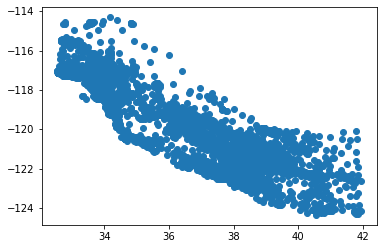

In [3]:
plt.scatter(data['latitude'],data['longitude'])

In [5]:
dt=data.loc[:,['latitude','longitude']]
dt['cluster']=0
dt

,latitude,longitude,cluster
0,37.88,-122.23,0
1,37.86,-122.22,0
2,37.85,-122.24,0
3,37.85,-122.25,0
4,37.85,-122.25,0
...,...,...,...
20635,39.48,-121.09,0
20636,39.49,-121.21,0
20637,39.43,-121.22,0
20638,39.43,-121.32,0


In [9]:
k=5
ran=np.random.randint(dt.shape[0],size=k)
centroids=dt.iloc[ran,:-1]
centroids['cluster']=range(k)
c_arr=np.array(centroids)
dt_arr=np.array(dt)
c_arr.shape, dt_arr.shape

((5, 3), (20640, 3))

In [29]:
for iteration in range (500):
    for i in range(dt_arr.shape[0]):
        dist=[]
        for c in c_arr:
            d=np.linalg.norm(dt_arr[i,:-1]-c[:-1])
            dist.append(d)
        clus=dist.index(np.min(dist))
        dt_arr[i,-1]=clus

    for c in range(k):
        c_arr[c,:-1]=np.mean(dt_arr[dt_arr[:,-1]==c][:,:-1],axis=0)


<AxesSubplot:>

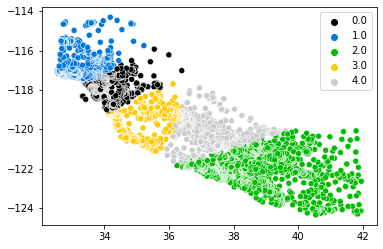

In [30]:
sns.scatterplot(x=dt_arr[:,0],y=dt_arr[:,1],hue=dt_arr[:,2],palette = "nipy_spectral")

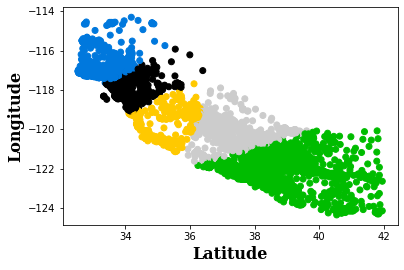

<Figure size 432x288 with 0 Axes>

In [43]:
x = dt_arr[:,0]
y = dt_arr[:,1]
colors = dt_arr[:,2]

plt.scatter(x, y, c=colors, cmap='nipy_spectral')
plt.xlabel('Latitude',fontsize=16, fontweight='bold',fontfamily='serif')
plt.ylabel('Longitude',fontsize=16, fontweight='bold',fontfamily='serif')

plt.show()
